In [292]:
import sys

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import matplotlib as mpl
import math
import cmath
from matplotlib.colors import hsv_to_rgb
import cv2

In [293]:
def cartesian_polar(img):
    h,w,channels = img.shape

    circle = np.zeros((2*h,2*h,3))
    i = 0
    fill_in = 3 # need to repeat this process for every pixel, to hit every point in the output circle, 3 was found to be the smallest where the whole circle is filled out and therefore most efficient
    for x in range(w):
        for y in range(h):
            for k in range(fill_in):

                x_offset = x + (k/fill_in)
                y_offset = y + (k/fill_in)

                normalized_x = x_offset/w
                theta = 2*np.pi * normalized_x # 2*pi is a full circle, norm(x)*2*pi is the angle on the circle
                r = y_offset

                x_new = r * np.sin(theta) + h # shift bottom left corner to 0,0
                alpha = np.pi - np.pi/2 - theta # a triangle's angles sum up to pi radians, minus theta and the right angle, this is the other angle
                y_new = r * np.sin(alpha)+ h # shift bottom left corner to 0,0

                pixel = img[y,x]

                #print(f"pixel:{pixel}")

                circle[int(np.floor(x_new)),int(np.floor(y_new))] = pixel

            i+=1

    return circle.astype(np.uint8)

In [294]:
def color_wheel():
    # Calculating a color band of HSV
    V, H = np.mgrid[0:1:100j, 0:1:300j]
    S = np.ones_like(V)
    HSV = np.dstack((H,S,V))
    RGB = hsv_to_rgb(HSV)
    RGB = 255*RGB
    RGB = RGB.astype(np.uint8)

    plt.imshow(RGB)
    plt.xlabel("H")
    plt.ylabel("V")
    plt.title("HSV Colorband")
    plt.show()

    # wrapping the color band around a circle
    circle = cartesian_polar(RGB)

    return circle

In [295]:
def normalize(n,min_n,max_n,min_out=0,max_out=1):
    normalized = (n - min_n) / (max_n - min_n)

    # shift to the desired interval
    shifted = min_out + (max_out-min_out)*(normalized)
    return shifted

In [307]:
def color_graph(X,Y,Z):
    # 0. show the standard color wheel
    circle = color_wheel()

    plt.imshow(circle)
    plt.show()

    colormap = np.zeros((X.shape[0],X.shape[1],3))

    # 1. possible case: the Z is complex
    h,w = Z.shape

    Z_re = Z.real
    min_re = Z_re.min()
    max_re = Z_re.max()
    Z_im = Z.imag
    min_im = Z_im.min()
    max_im = Z_im.max()

    for i in range(w):
        for j in range(h):
            z = Z[i,j]
            # split z into its real and imaginary parts
            z_re = z.real
            z_im = z.imag

            # normalize the numbers to a value from [-100,100] because 100 is the radius of the color wheel
            z_re_norm = int(normalize(z_re,min_re,max_re,-100,100)) + 100 # need to shift because the circle is actually an array with indices in the range [0,199]
            if z_re_norm > 199:
                z_re_norm = 199
            z_im_norm = int(normalize(z_im,min_im,max_im,-100,100)) + 100
            if z_im_norm > 199:
                z_im_norm = 199

            # get color value at this point from the color wheel
            pixel = circle[z_re_norm,z_im_norm]
            colormap[i,j] = pixel

    colormap = colormap.astype(np.uint8)
    plt.imshow(colormap)
    plt.axis('off')
    plt.show()

    # 2. possible case: the z_in/z_out are actually (x,y) tuples/ arrays
    return colormap

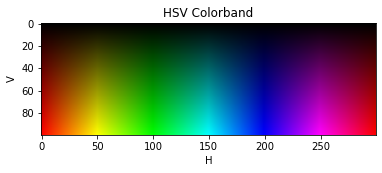

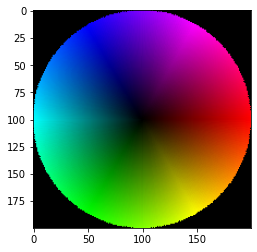

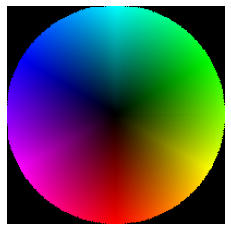

In [308]:
x = np.arange(-100,100,1)
y = np.arange(-100,100,1)
X,Y = np.meshgrid(x,y)

# convert to imaginary numbers
Z = X + 1j*Y

Z = Z

color_map = color_graph(X,Y,Z)